In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
from prody import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import *
import seaborn as sns
import pandas as pd

# get point data

In [2]:
def calcDistancesloop2_Bsheet(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 134 and name CA')
        ca2 = structure.select('resid 294 and name CA')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop2_lid(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 294 and name CA')
        ca2 = structure.select('resid 113 and name CA')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop2_loop3(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 232 and name OD2')
        ca2 = structure.select('resid 293 and name NH2')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop1_helix2(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 73 and name NE1')
        ca2 = structure.select('resid 305 and name NE')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop1_loop2(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 83 and name OG')
        ca2 = structure.select('resid 311 and name CE')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

In [ ]:
# all distances
# mutations = ['G188Q', 'L155W', 'V135A', 'WT']
mutations = ['WT_AF', 'N272H_AF', 'G188Q_AF', 'L155W_AF', 'V135A_AF'] # ['WT', 'WT_AF']
Runs = ['Run1', 'Run2']

frames = ["{:04}".format(i) for i in range(1, 2001)]


allDistance = {}
for currMutation in mutations:
    if currMutation not in allDistance:
        allDistance[currMutation] = {}
    
    if currMutation == 'WT_AF':
        Running = ['Run2', 'Run3']
    else:
        Running = ['Run1', 'Run2']
        
    for currRuns in Running:
        currRun = currRuns + '_frame'
        if currRuns not in allDistance[currMutation].keys():
            allDistance[currMutation][currRuns] = {}

        if currMutation in ['WT_AF', 'N272H_AF']:
            currDirectory = '../CPOX_AF_MD/' + currMutation + '/' + currRun + '/'

            dist_134_294_1, dist_134_294_2 = calcDistancesloop2_Bsheet(frames, currDirectory)
            dist_294_113_1, dist_294_113_2 = calcDistancesloop2_lid(frames, currDirectory)
            dist_232_293_1, dist_232_293_2 = calcDistancesloop2_loop3(frames, currDirectory)
            dist_73_305_1, dist_73_305_2 = calcDistancesloop1_helix2(frames, currDirectory)
            dist_83_311_1, dist_83_311_2 = calcDistancesloop1_loop2(frames, currDirectory)
            
            allDistance[currMutation][currRuns]['134_294'] = {'1': dist_134_294_1, '2':dist_134_294_2}
            allDistance[currMutation][currRuns]['83_311'] = {'1': dist_83_311_1, '2':dist_83_311_2}
            allDistance[currMutation][currRuns]['134_113'] = {'1': dist_294_113_1, '2':dist_294_113_2}
            allDistance[currMutation][currRuns]['232_293'] = {'1': dist_232_293_1, '2':dist_232_293_2}
            allDistance[currMutation][currRuns]['73_305'] = {'1': dist_73_305_1, '2':dist_73_305_2}
        else:
            currDirectory = '../CPOX_AF_mutation/' + currMutation + '/' + currRun + '/'

            dist_134_294_1, dist_134_294_2 = calcDistancesloop2_Bsheet(frames, currDirectory)
            dist_294_113_1, dist_294_113_2 = calcDistancesloop2_lid(frames, currDirectory)
            dist_232_293_1, dist_232_293_2 = calcDistancesloop2_loop3(frames, currDirectory)
            dist_73_305_1, dist_73_305_2 = calcDistancesloop1_helix2(frames, currDirectory)
            dist_83_311_1, dist_83_311_2 = calcDistancesloop1_loop2(frames, currDirectory)
            
            allDistance[currMutation][currRuns]['134_294'] = {'1': dist_134_294_1, '2':dist_134_294_2}
            allDistance[currMutation][currRuns]['83_311'] = {'1': dist_83_311_1, '2':dist_83_311_2}
            allDistance[currMutation][currRuns]['134_113'] = {'1': dist_294_113_1, '2':dist_294_113_2}
            allDistance[currMutation][currRuns]['232_293'] = {'1': dist_232_293_1, '2':dist_232_293_2}
            allDistance[currMutation][currRuns]['73_305'] = {'1': dist_73_305_1, '2':dist_73_305_2}


@> 10922 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 10922 atoms and 1 coo

In [ ]:
data = allDistance

# Prepare DataFrame columns and data
columns = []
data_lists = []

# Process data
for mutation in data:
    for run in data[mutation]:
        for dist_key, chains in data[mutation][run].items():
            for chain_id, values in chains.items():
                col_name = f"{mutation}_{run}_{dist_key}_{chain_id}"
                columns.append(col_name)
                data_lists.append(values)  # Append the whole list, not extend

# Create DataFrame from the lists
df = pd.DataFrame(list(zip(*data_lists)), columns=columns)

# Write to Excel file
df.to_excel("AF_distances_update.xlsx", engine='openpyxl', index=False)

### Read file

In [61]:

import pandas as pd
from collections import defaultdict

# Read the Excel file
file_name = "AF_distances_update.xlsx"
df = pd.read_excel(file_name)

# Initialize a nested dictionary
allDistance = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

# Process each column
for col in df.columns:
    # Split the column name to extract components
    keys = col.split("_")

    mutation, run, dist_key, chain_id = keys[0] + '_' + keys[1], keys[2], keys[3] + '_' + keys[4], keys[5]
    
    # Extract the numeric data from the column
    temp_data = df[col].dropna().tolist()  # Drop NaN values and convert to a list
    
    # Assign to the dictionary
    allDistance[mutation][run][dist_key][chain_id] = temp_data


# Convert to a standard dict if desired
allDistance = dict(allDistance)

In [90]:
len(allDistance['WT_AF']['Run3']['134_113']['1'])

2000

In [ ]:
def parse_features(file_path):
    features = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if parts[0] != 'frame':
                frame_pocket = (int(parts[0].split('_')[1]), parts[1].strip())  # Tuple of (frame, pocket)
                # Extracting features as a dict
                feature_values = dict(part.split(': ') for part in parts[2:])
                features[frame_pocket] = feature_values
    return features

# Parse the file containing the pockets of interest
def parse_pockets_of_interest(file_path):
    pockets_of_interest = {}
    countList = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            frame = parts[0]
            pocket = parts[1]
            ratio = parts[2].split(',')
            if frame != 'frame':
                pockets_of_interest[int(frame.split('_')[1])] = pocket
                countList[int(frame.split('_')[1])] = [float(x) for x in ratio]
    return pockets_of_interest, countList

def FeatureDistribution(features, pockets_of_interest):
    frames = sorted(pockets_of_interest.keys(), key=lambda x: int(x))
    volumes = [float(features[(frame, pockets_of_interest[frame])]['Volume']) \
                      for frame in frames]
    
    return volumes



In [ ]:
chain1_cutoff_count = {}
chain2_cutoff_count = {}
cutoffs = 1
pocket_pick = {}

for currMutation in mutations:
    if currMutation not in chain1_cutoff_count:
        chain1_cutoff_count[currMutation] = {}
    if currMutation not in chain2_cutoff_count:
        chain2_cutoff_count[currMutation] = {}
        
    if currMutation not in pocket_pick:
        pocket_pick[currMutation] = {}
    
    if currMutation == 'WT_AF':
        Running = ['Run2', 'Run3']
    else:
        Running = ['Run1', 'Run2']
        
    for run in Running:
        if run not in chain1_cutoff_count[currMutation]:
            chain1_cutoff_count[currMutation][run] = {}
        if run not in chain2_cutoff_count[currMutation]:
            chain2_cutoff_count[currMutation][run] = {}
            
        if run not in pocket_pick[currMutation]:
            pocket_pick[currMutation][run] = {}   
        
        if currMutation in ['WT_AF', 'N272H_AF']:    
            features_file = '../CPOX_AF_MD/' + currMutation + '/' + run + '_Features.txt'
            features = parse_features(features_file)
            pockets_of_interest_file = '../CPOX_AF_MD/' + currMutation + '/fpocketResults/' + run + '_chain2.txt'
            pockets_of_interest, cutoff_count = parse_pockets_of_interest(pockets_of_interest_file)
            volumes = FeatureDistribution(features, pockets_of_interest)
            chain1_cutoff_count[currMutation][run] = volumes
            
            # print (features)
            pockets_of_interest_file_2 = '../CPOX_AF_MD/' + currMutation + '/fpocketResults/' + run + '_chain1.txt'
            pockets_of_interest_2, cutoff_count_2 = parse_pockets_of_interest(pockets_of_interest_file_2)
            volumes2 = FeatureDistribution(features, pockets_of_interest_2)
            
            chain2_cutoff_count[currMutation][run] = volumes2
        
        else:   
            features_file = '../CPOX_AF_mutation/' + currMutation + '/' + run + '_Features.txt'
            features = parse_features(features_file)
            pockets_of_interest_file = '../CPOX_AF_mutation/' + currMutation + '/fpocketResults/' + run + '_chain2.txt'
            pockets_of_interest, cutoff_count = parse_pockets_of_interest(pockets_of_interest_file)
            volumes = FeatureDistribution(features, pockets_of_interest)
            chain1_cutoff_count[currMutation][run] = volumes
            
            # print (features)
            pockets_of_interest_file_2 = '../CPOX_AF_mutation/' + currMutation + '/fpocketResults/' + run + '_chain1.txt'
            pockets_of_interest_2, cutoff_count_2 = parse_pockets_of_interest(pockets_of_interest_file_2)
            volumes2 = FeatureDistribution(features, pockets_of_interest_2)
            
            chain2_cutoff_count[currMutation][run] = volumes2

In [ ]:
len(chain1_cutoff_count['V135A_AF']['Run2'])

# PCA

In [4]:
fileNames = []
mutations = ['WT_AF', 'N272H_AF', 'G188Q_AF', 'L155W_AF', 'V135A_AF']
for mutate in mutations:
    if mutate == 'WT_AF':
        Running = ['Run1', 'Run2']
    else:
        Running = ['Run1', 'Run2']
    for run in Running:
        for frame in [str(i).zfill(4) for i in range(1, 2001)]:
            if mutate in ['WT_AF', 'N272H_AF']:
                fileNames.append('../CPOX_AF_MD/' + mutate + '/' + run + '_frame/frame_' + frame + '.pdb')
            else:
                fileNames.append('../CPOX_AF_mutation/' + mutate + '/' + run + '_frame/frame_' + frame + '.pdb')

print (len(fileNames))

20000


In [5]:
fileNames[-3:]# metrics

['../CPOX_AF_mutation/V135A_AF/Run2_frame/frame_1998.pdb',
 '../CPOX_AF_mutation/V135A_AF/Run2_frame/frame_1999.pdb',
 '../CPOX_AF_mutation/V135A_AF/Run2_frame/frame_2000.pdb']

In [6]:
reference_structure = parsePDB('../CPOX_AF_MD/WT_AF/Run1/step3_input.pdb', subset='ca').select("resnum 14 to 339")
reference_structure

@> 692 atoms and 1 coordinate set(s) were parsed in 0.23s.


<Selection: 'resnum 14 to 339' from step3_input_ca (652 atoms)>

In [7]:
pdbs_all = parsePDB(fileNames, subset='ca')
# reference_structure = parsePDB('../CPOX_MD/WT/Run1/step3_input.pdb', subset='ca').select("res")
pdbs_all.insert(0, reference_structure)

# pdbs_all_filter = [item.select("resnum 122 to 447") for item in pdbs_all[:3001]]
# pdbs_all_filter += [item.select("resnum 14 to 339") for item in pdbs_all[3001:]]

len(pdbs_all)

@> 20000 PDBs were parsed in 409.25s.                                              


20001

In [8]:
# pdbs_all_filter[-3:]
pdbs_all[-3:]

[<AtomGroup: frame_1998_ca (692 atoms)>,
 <AtomGroup: frame_1999_ca (692 atoms)>,
 <AtomGroup: frame_2000_ca (692 atoms)>]

In [9]:
    
ensemble_all = buildPDBEnsemble(pdbs_all, ref=reference_structure)
pca = PCA('allAligned')           # Instantiate a PCA instance
pca.buildCovariance(ensemble_all)   # Build covariance for the ensemble
pca.calcModes()                 # Calculate modes (20 of the by default)
    

@> Starting iterative superposition:                     
@> Step #1: RMSD difference = 1.0136e+00
@> Step #2: RMSD difference = 2.4237e-04
@> Step #3: RMSD difference = 1.6862e-07
@> Iterative superposition completed in 16.86s.
@> Final superposition to calculate transformations.
@> Superposition completed in 5.27 seconds.
@> Ensemble (20001 conformations) were built in 4117.86s.
@> Covariance is calculated using 20001 coordinate sets.
@> Covariance matrix calculated in 2.379893s.
@> 20 modes were calculated in 0.32s.


In [14]:
allResults = calcProjection(ensemble_all, pca[:2])

In [15]:
allResults.shape

(20001, 2)

In [16]:
import numpy as np
from scipy.spatial import KDTree

# Example: Replace this with your actual data
data = np.random.rand(20001, 2)  # Replace with your actual array

# Mutation names
mutations = ['WT_AF', 'N272H_AF', 'G188Q_AF', 'L155W_AF', 'V135A_AF']

# Function to calculate the most dense region point index for each mutation
def calculate_dense_region_indices(data, mutations, points_per_mutation=4000, radius=0.05):
    indices = []
    for i, mutation in enumerate(mutations):
        # Slice the data for the current mutation
        start = 1 + i * points_per_mutation
        end = start + points_per_mutation
        mutation_points = data[start:end]

        # Build KDTree and calculate density (number of neighbors within radius)
        tree = KDTree(mutation_points)
        densities = tree.query_ball_point(mutation_points, r=radius)  # Neighbors within radius
        density_counts = [len(d) for d in densities]

        # Find the index of the point representing the densest region
        local_index = np.argmax(density_counts)
        global_index = start + local_index
        indices.append(global_index)
        print(f"Densest region for {mutation}: Point index {global_index}, Local index {local_index}")

    return indices

# Calculate the indices of the densest regions
dense_region_indices = calculate_dense_region_indices(data, mutations)

print("Densest Region Indices:", dense_region_indices)


Densest region for WT_AF: Point index 2023, Local index 2022
Densest region for N272H_AF: Point index 5154, Local index 1153
Densest region for G188Q_AF: Point index 8141, Local index 140
Densest region for L155W_AF: Point index 13843, Local index 1842
Densest region for V135A_AF: Point index 18547, Local index 2546
Densest Region Indices: [2023, 5154, 8141, 13843, 18547]


In [54]:
data = allResults
len(data)

20001

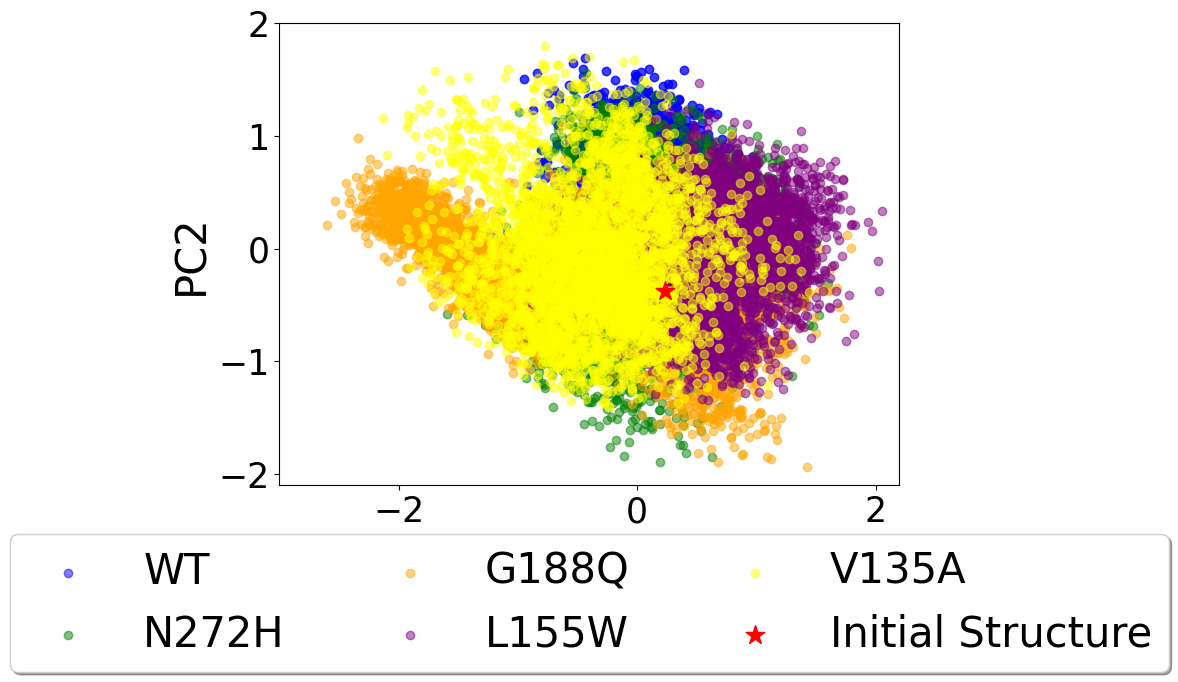

In [36]:
# Define labels and colors:
colors = ['blue', 'green', 'orange', 'purple', 'yellow']  # Colors for WT, G188Q, L155W, V135A
labels = ['WT', 'N272H', 'G188Q', 'L155W', 'V135A']

# Create the plot
plt.figure(figsize=(8, 6))
# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})

x_range = [-3, 2.2]
y_range = [-2.1, 2]

# Plot each of the 5000 points for the 4 labels
for i, color in enumerate(colors):
    start = 1 + i * 4000
    end = 1 + (i + 1) * 4000
    plt.scatter(data[start:end, 0], data[start:end, 1], color=color, alpha=0.5, label=labels[i])
    # plt.scatter(data[start:end, 0], data[start:end, 1], color=color, alpha=0.5)

# Plot the initial structure with a red star
plt.scatter(data[0, 0], data[0, 1], color='red', marker='*', s=200, label='Initial Structure')
    
# Setting the plot title and labels
# plt.title('PCA of CPOX')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Set x and y ranges using xlim and ylim for good measure
plt.xlim(x_range)
plt.ylim(y_range)

# Adding a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), shadow=True, ncol=3)
# Show the plot
# Save the figure with tight layout to ensure all elements are visible
plt.savefig('AF_PCA_label.png', dpi=800, bbox_inches='tight')
# plt.show()

In [94]:
labels

['WT(AF)', 'N272H(AF)', 'G188Q(AF)', 'L155W(AF)', 'V135A(AF)']

In [51]:
!xdg-open .

In [105]:
i = 4
start = 1 + i * 4000
end = 1 + (i + 1) * 4000

# ['WT', 'N272H', 'G188Q', 'L155W', 'V135A']
WT_data_x = data[start:end, 0]#, data[start:end, 1]# Create the plot
WT_data_y = data[start:end, 1]

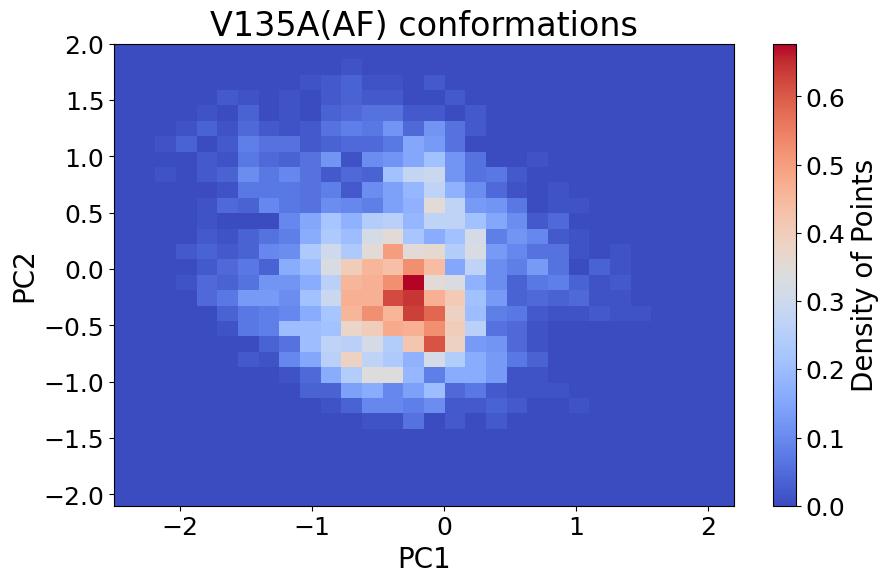

In [106]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define the number of bins
bins = [30, 30]  # You can adjust this for different resolutions

# Define the x and y ranges explicitly for the histogram
x_range = [-3, 2.2]
y_range = [-2.1, 2]

# Create the 2D histogram plot
plt.figure(figsize=(10, 6))
h, xedges, yedges, image = plt.hist2d(WT_data_x, WT_data_y, bins=bins, range=[x_range, y_range], cmap='coolwarm', density=True)

# Add a colorbar to show the color scale
plt.colorbar(label='Density of Points')

# Adding labels and title
plt.title(labels[i] + ' conformations')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Set x and y ranges
# plt.xlim(x_range)
# plt.ylim(y_range)

# Set x and y ranges using xlim and ylim for good measure
plt.xlim(x_range)
plt.ylim(y_range)

# Show plot
# plt.savefig(labels[i] + '_density.png', dpi=600)
plt.show()

In [37]:
WT_data_x_list = []
WT_data_y_list = []

for i in range (5):
    start = 1 + i * 4000
    end = 1 + (i + 1) * 4000
    
    # ['WT', 'N272H', 'G188Q', 'L155W', 'V135A']
    WT_data_x = data[start:end, 0]#, data[start:end, 1]# Create the plot
    WT_data_y = data[start:end, 1]

    WT_data_x_list.append(WT_data_x)
    WT_data_y_list.append(WT_data_y)

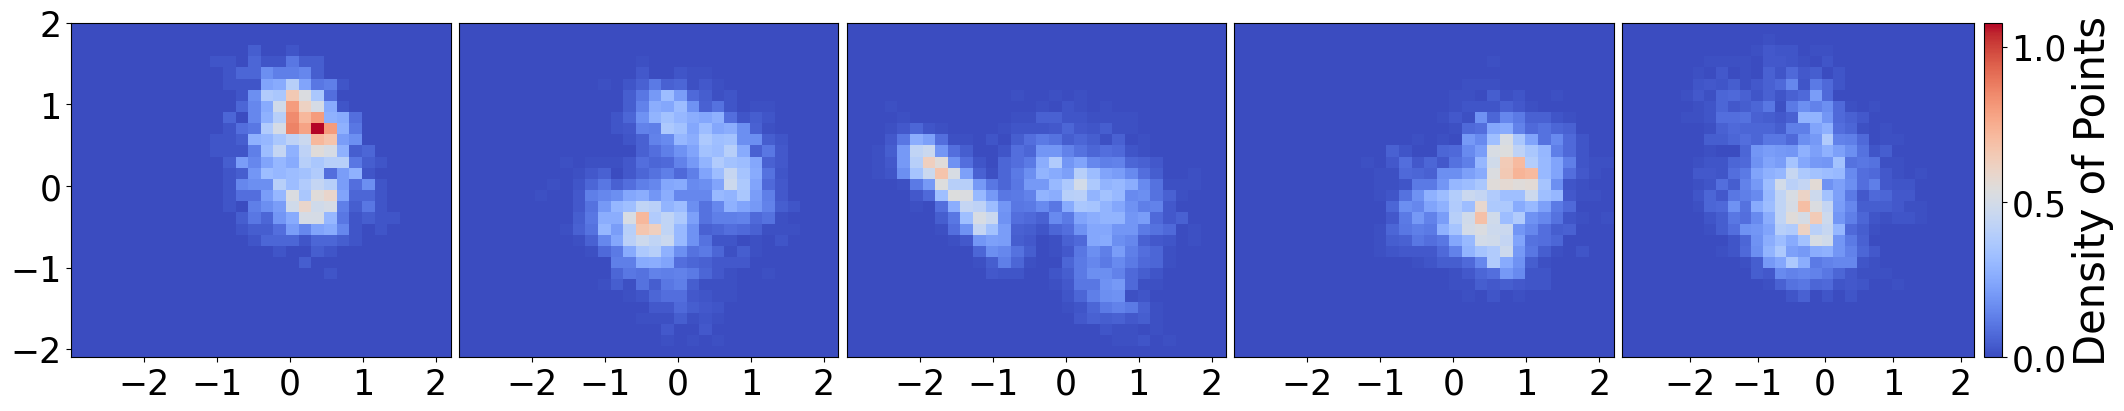

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define the number of bins
bins = [30, 30]  # You can adjust this for different resolutions

# Define the x and y ranges explicitly for the histogram
x_range = [-3, 2.2]
y_range = [-2.1, 2]

# Precompute histogram data to determine the shared color range
histograms = [
    np.histogram2d(x, y, bins=bins, range=[x_range, y_range], density=True)[0]
    for x, y in zip(WT_data_x_list, WT_data_y_list)
]

# Determine the global min and max for color normalization
vmin = np.min([np.min(hist) for hist in histograms])
vmax = np.max([np.max(hist) for hist in histograms])

# Adjust the figure size dynamically based on the number of plots and desired aspect ratio
num_plots = len(WT_data_x_list)
plot_width = 4  # Adjust the width of each subplot
plot_height = 4  # Adjust the height of each subplot
fig, axes = plt.subplots(1, num_plots, figsize=(plot_width * num_plots, plot_height), constrained_layout=True)

# Plot each histogram
for i, (ax, hist, WT_data_x, WT_data_y) in enumerate(zip(axes, histograms, WT_data_x_list, WT_data_y_list)):
    h, xedges, yedges, _ = ax.hist2d(
        WT_data_x, WT_data_y, bins=bins, range=[x_range, y_range], cmap='coolwarm', density=True, vmin=vmin, vmax=vmax
    )
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

    # Show yticks only for the leftmost subplot
    if i == 0:
        ax.set_yticks([-2, -1, 0, 1, 2])  # Customize as needed
    else:
        ax.set_yticks([])
    
    # Set xticks
    ax.set_xticks([-2, -1, 0, 1, 2])  # Customize as needed

# Add a shared colorbar close to the subplots
divider = make_axes_locatable(axes[-1])  # Attach to the last axis
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adjust size and padding
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cax)
cbar.set_label('Density of Points')

# Show plot
plt.savefig('PC_density.png', dpi=800, bbox_inches='tight')
# plt.show()


# PCA vs key metrics

In [64]:
data.shape

(20001, 2)

In [65]:
# N272H_data_x = data[6000:, 0]#, data[start:end, 1]# Create the plot
# N272H_data_y = data[6000:, 2]

WT_data_x = data # [:6000, 0]#, data[start:end, 1]# Create the plot
WT_data_y = data # [:6000, 2]

print (len(WT_data_x), len(WT_data_y))
# print (len(N272H_data_x), len(N272H_data_y))



20001 20001


In [71]:
# get necessary data
# currDistance = '232_293' # 134_294, 134_297, 232_293
chain = '1'

currDist_134_294 = [] # loop2 - Bsheet
currDist_134_113 = [] # loop2 - lid
currDist_232_293 = [] # loop2 - loop3
currDist_73_305 = [] # loop1 - helix2
currDist_83_311 = [] # loop1 - loop2
currVol = []
for currMutation in mutations:
    if currMutation == 'WT_AF':
        Running = ['Run2', 'Run3']
    else:
        Running = ['Run1', 'Run2']
    for run in Running:
        currDist_134_294 += allDistance[currMutation][currRuns]['134_294'][chain]
        currDist_134_113 += allDistance[currMutation][currRuns]['134_113'][chain]
        currDist_232_293 += allDistance[currMutation][currRuns]['232_293'][chain]
        currDist_73_305 += allDistance[currMutation][currRuns]['73_305'][chain]
        currDist_83_311 += allDistance[currMutation][currRuns]['83_311'][chain]

        '''
        if chain == '1':
            currVol += chain1_cutoff_count[currMutation][run]
        else:
            currVol += chain2_cutoff_count[currMutation][run]
        '''

# Modes vs metrics

In [223]:
!xdg-open .

In [63]:
len(allResults)

20001

In [30]:
# currDist_134_294, currDist_134_113, currDist_232_293, currDist_73_305, currDist_83_311, 
# currVol

In [72]:
xlabels = 'PC1'
x_data = data[1:, 0] # PCx

# ylabels = 'Volumes'
# y_data = currVol

ylabels = 'Loop2-lid'
y_data = currDist_134_113

# ylabels = 'Loop2 - loop3'
# y_data = currDist_232_293

# ylabels = 'Loop1 - loop2'
# y_data = currDist_83_311

if chain == '1':
    currChainPlot = 'A'
else:
    currChainPlot = 'B'

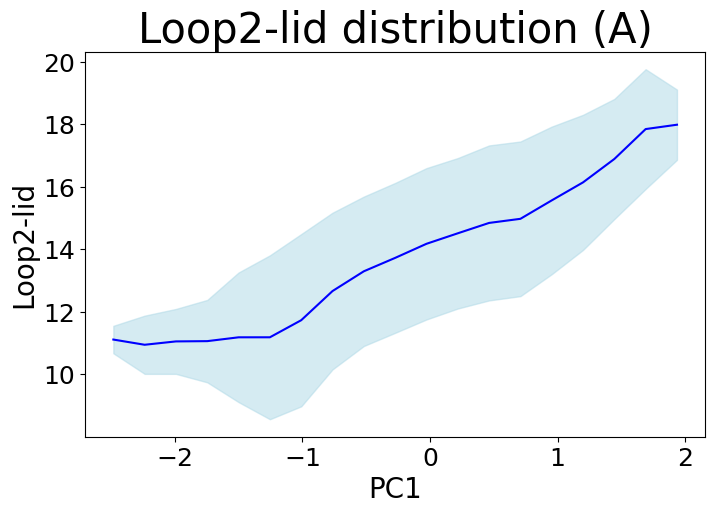

In [101]:
import numpy as np

plt.figure(figsize=(8, 5))
# Increase font sizes
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rcParams.update({'font.size': 20})

x_data = np.array(x_data)
y_data = np.array(y_data)

# Calculate the bin edges and digitize x_data to determine bin membership
bin_edges = np.linspace(min(x_data), max(x_data), 20)  # Still use 20 bins, adjust as needed
digitized = np.digitize(x_data, bin_edges)

# Calculate the average y_data for each bin and standard deviation
bin_means = [y_data[digitized == i].mean() if np.sum(digitized == i) > 0 else np.nan for i in range(1, len(bin_edges))]
bin_std = [y_data[digitized == i].std() if np.sum(digitized == i) > 0 else np.nan for i in range(1, len(bin_edges))]

# Define the bin centers (still float values)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the average y_data for each bin (using float data)
plt.plot(bin_centers, bin_means, label='Average Y', color='blue')

# Fill the area around the line with the standard deviation (shaded area)
plt.fill_between(bin_centers, np.array(bin_means) - np.array(bin_std), np.array(bin_means) + np.array(bin_std), color='lightblue', alpha=0.5)

# Set the x-axis and y-axis labels
plt.xlabel(xlabels, fontsize=20)
plt.ylabel(ylabels, fontsize=20)

# Add a title
plt.title(ylabels + ' distribution (' + currChainPlot + ')', fontsize=30)

# Show the plot
# plt.savefig(xlabels + '_' + ylabels + '_' + currChainPlot + '.png', dpi=800)
plt.show()

In [70]:
len(y_data)

0

In [256]:
!xdg-open .

# Only loop-lid distances

In [95]:
len(allDistance['WT_AF']['Run2']['134_113']['1'])

2000

In [102]:
# get necessary data
# currDistance = '232_293' # 134_294, 134_297, 232_293
chain = '1'


currDist_134_113_1 = [] # loop2 - lid
currDist_134_113_2 = [] # loop2 - lid

currVol = []
for currMutation in mutations:
    if currMutation == 'WT_AF':
        Running = ['Run2', 'Run3']
    else:
        Running = ['Run1', 'Run2']
    for run in Running:
        # print (currMutation, run, len(allDistance[currMutation][run]['134_113'][chain]))
        currDist_134_113_1 += allDistance[currMutation][run]['134_113']['1']
        currDist_134_113_2 += allDistance[currMutation][run]['134_113']['2']
        '''
        if chain == '1':
            currVol += chain1_cutoff_count[currMutation][run]
        else:
            currVol += chain2_cutoff_count[currMutation][run]
        '''

In [94]:
len(currDist_134_113)

20000

In [83]:
len(allDistance['N272H_AF']['Run1']['134_113']['1'])

2000

In [97]:
xlabels = 'PC1'
x_data = data[1:, 0] # PCx

ylabels = 'Loop2-lid'
y_data = currDist_134_113

if chain == '1':
    currChainPlot = 'A'
else:
    currChainPlot = 'B'

In [100]:
len(x_data)

20000

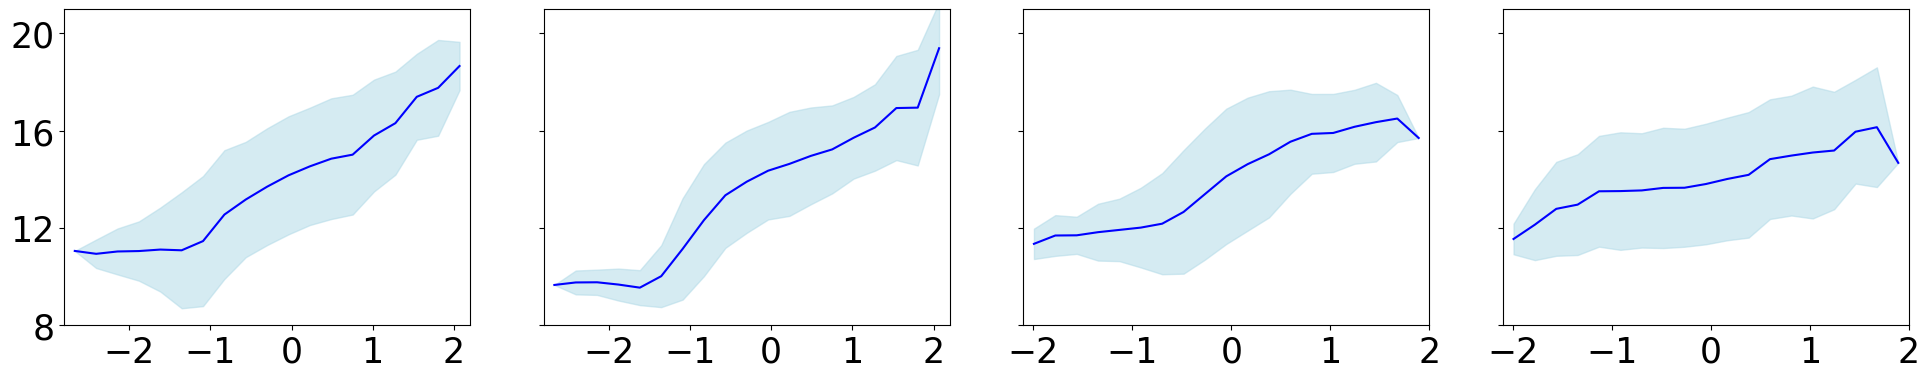

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for four plots
x_data_list = [data[1:, 0], data[1:, 0], data[1:, 1], data[1:, 1]]  # List of x_data arrays
y_data_list = [currDist_134_113_1, currDist_134_113_2, currDist_134_113_1, currDist_134_113_2]  # List of y_data arrays

# Define x-ranges for subplots
x_ranges = [(-2.8, 2.2), (-2.8, 2.2), (-2.1, 2), (-2.1, 2)]
y_range = (8, 21)

# Set the width and height for each subplot
subplot_width = 5  # Width of each subplot
subplot_height = 4.5  # Height of each subplot

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(subplot_width * 4, subplot_height), sharey=True)


# Configure global font size
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})

# Loop through datasets and axes
for i, (x_data, y_data, ax, x_range) in enumerate(zip(x_data_list, y_data_list, axes, x_ranges)):
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    # Calculate bin edges and digitize x_data to determine bin membership
    bin_edges = np.linspace(x_range[0], x_range[1], 20)
    digitized = np.digitize(x_data, bin_edges)

    # Calculate the average y_data for each bin and standard deviation
    bin_means = [y_data[digitized == j].mean() if np.sum(digitized == j) > 0 else np.nan for j in range(1, len(bin_edges))]
    bin_std = [y_data[digitized == j].std() if np.sum(digitized == j) > 0 else np.nan for j in range(1, len(bin_edges))]

    # Define the bin centers
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Plot the average y_data for each bin
    ax.plot(bin_centers, bin_means, label='Average Y', color='blue')

    # Fill the area around the line with the standard deviation
    ax.fill_between(bin_centers, np.array(bin_means) - np.array(bin_std),
                    np.array(bin_means) + np.array(bin_std), color='lightblue', alpha=0.5)

    # Set axis limits
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

    # Show y-axis ticks only for the first subplot
    if i > 0:
        ax.tick_params(axis='y', labelleft=False)

    # Set x-ticks for all plots
    ax.set_xticks([-2, -1, 0, 1, 2])
    ax.set_yticks([8, 12, 16, 20])

# Adjust layout
fig.tight_layout()

plt.savefig('PC_Distances.png', dpi=800, bbox_inches='tight')
# Show the plot
# plt.show()

In [108]:
len(x_data_list[0])

20000

In [110]:
len(y_data_list)

4